In [1]:
# import libraries
import os
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import cross_val_score


In [ ]:
https://datascienceomar.wordpress.com/2016/07/12/regression-trees-scikit-learn/

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## define data

In [3]:
os.listdir()

['candy-data.csv',
 'candy_recommendation_clean.ipynb',
 'Untitled.ipynb',
 'candy_recommendation.ipynb',
 'candy_recommendation-Copy1.ipynb',
 'Lidl Analytics Data Science Case GER.pdf',
 '.ipynb_checkpoints']

## Load candy data

Got data from [538 site](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking). 

In [4]:
fname = 'candy-data.csv'
data = pd.read_csv(fname)
data.T

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
competitorname,100 Grand,3 Musketeers,One dime,One quarter,Air Heads,Almond Joy,Baby Ruth,Boston Baked Beans,Candy Corn,Caramel Apple Pops,...,Tootsie Roll Juniors,Tootsie Roll Midgies,Tootsie Roll Snack Bars,Trolli Sour Bites,Twix,Twizzlers,Warheads,WelchÕs Fruit Snacks,WertherÕs Original Caramel,Whoppers
chocolate,1,1,0,0,0,1,1,0,0,0,...,1,1,1,0,1,0,0,0,0,1
fruity,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,1,1,0,0
caramel,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
peanutyalmondy,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
nougat,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
crispedricewafer,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
hard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
bar,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
pluribus,0,0,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


# Two types of variable
* boolean : chocolate, fruity, caramel, peanutyalmondy, nougat, crisperdricewafer, hard, bar, pluribus

* probability (0-1): sugarpercent, pricepercent, winpercent

## Assign Data Types

In [5]:
categories = ['chocolate', 'fruity','caramel','peanutyalmondy',\
              'nougat','crispedricewafer','hard','bar','pluribus']
data[categories] = data[categories].astype(bool)
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,True,False,True,False,False,True,False,True,False,0.732,0.860,66.971725
1,3 Musketeers,True,False,False,False,True,False,False,True,False,0.604,0.511,67.602936
2,One dime,False,False,False,False,False,False,False,False,False,0.011,0.116,32.261086
3,One quarter,False,False,False,False,False,False,False,False,False,0.011,0.511,46.116505
4,Air Heads,False,True,False,False,False,False,False,False,False,0.906,0.511,52.341465


## Summarize Data

In [6]:
f"In total, there are {len(data)} bars."

'In total, there are 85 bars.'

/Users/soyoung/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


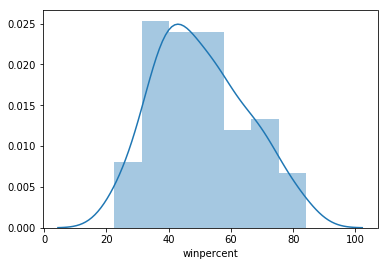

In [7]:
sns.distplot(data.loc[:,'winpercent']);

In [8]:
# correlation of the features
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)
# prints a descending list of correlation pair (Max on top)
# (corrank(data))

# Explorative Analysis

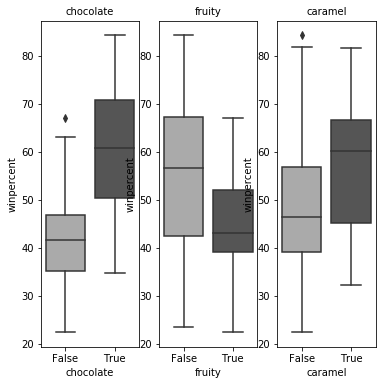

In [9]:
plt.figure(figsize=(6,6))
feature_name = ['chocolate', 'fruity', 'caramel']
for s in range(3):
    plt.subplot(1,3,s+1)
    plt.title(feature_name[s],fontsize=10)
    sns.boxplot(data=data,x=feature_name[s],y="winpercent",color="red",palette="gray_r")

# Define X, Y (split)

In [10]:
# X, Y define
data_keys = data.keys()
data_keys

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [11]:
Y = data.winpercent
X = data[data.columns[1:-1]]#data.loc[:, data.columns != ['winpercent'] && 'competitorname']]
X.shape, Y.shape

# Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.20)

# Decision Tree

In [12]:
# decision tree
from sklearn import tree
# X = data[data.columns[1:-1]]
# Y = data[data.columns[-1]]

# decision tree. Prediction vs Actual 
clf = tree.DecisionTreeRegressor(max_depth=5)
#Training the decision tree classifier. 
reg = clf.fit(X_train, y_train)


<Figure size 576x576 with 0 Axes>

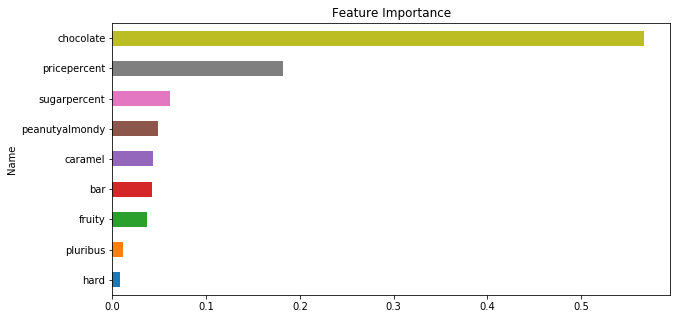

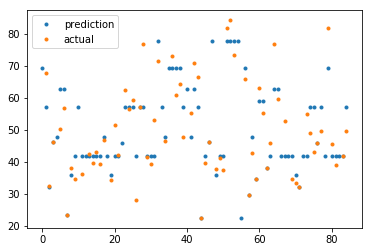

In [13]:
# plot data
# Feature Importance
imp = pd.DataFrame.from_dict({'Name':data.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)

f = plt.figure(figsize=(8,8))
# plt.subplot(3,1,2)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)
plt.show()
# Prediction
y_pred =  clf.predict(X)
y_pred_train = clf.predict(X_train)

# plt.subplot(3,1,2)
plt.plot(y_pred, '.')
plt.plot(y_train, '.')
plt.legend(['prediction', 'actual'])
plt.show()

In [14]:
#. Get the r2_score (accuracy) between predicted y_test values and actual y_values

from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)
# y_train.values.reshape(-1,1).shape, y_pred_train.shape
# clf.score(y_train.values.reshape(-1,1), y_pred_train)
# type(y_pred_train), type(y_train.values())
# y_pred.shape, y_test.shape

0.7968329863083472

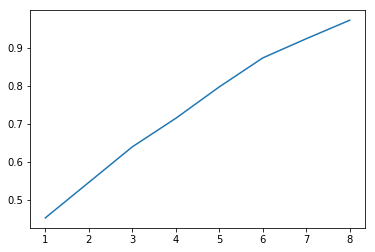

In [15]:
from sklearn.model_selection import cross_val_score
all_scores = []
best_score = -1
best_depth = 0
i=9
for i in range(1,9):
    treereg = tree.DecisionTreeRegressor(max_depth=i, random_state=42)
    scores = cross_val_score(treereg, X_train, y_train, cv=3)#, scoring='mean_squared_error')
    treereg.fit(X_train, y_train)
    y_pred_train = treereg.predict(X_train)
    current_score = r2_score(y_train, y_pred_train)
    all_scores.append(current_score)
plt.plot(range(1,9),all_scores)


# Logistic Regression

In [16]:
logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

In [17]:
winners = data[data.winpercent>data.winpercent.quantile(.6)]

In [18]:
linear_X = data.loc[:, ['sugarpercent', 'pricepercent']]
lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(linear_X, Y, test_size = 0.2)


In [19]:
lm = lin_reg.fit(X_train, y_train)
pred_Y = lin_reg.predict(linear_X)
pred_Y.shape

/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(85,)

In [20]:
print("Linear Regression: {:2.2f} X0 + {:2.2f} X1 +  {:2.2f}" .format(lin_reg.coef_[0], lin_reg.coef_[1], lin_reg.intercept_))#} test"
linear_X.keys()

Linear Regression: 6.84 X0 + 14.71 X1 +  40.18


Index(['sugarpercent', 'pricepercent'], dtype='object')

Text(0, 0.5, 'winpercent')

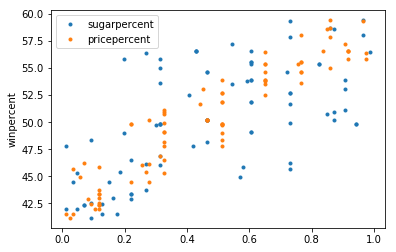

In [21]:
plt.plot(linear_X, pred_Y, '.')
plt.legend(['sugarpercent', 'pricepercent'])
plt.ylabel('winpercent')

In [22]:
residuals = pred_Y - Y
pred_Y.shape
np.concatenate((pred_Y, Y), axis=None).shape
# plt.plot([residuals, pred_Y], '--')

(170,)

In [23]:
Y.shape, X.shape

((85,), (85, 11))

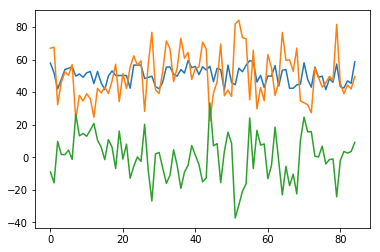

In [24]:
plt.plot(pred_Y)
plt.plot(Y)
plt.plot(residuals)
plt.show()

In [25]:
from sklearn import preprocessing
log_reg = LogisticRegression()
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.2)


/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


((68,), (68,))

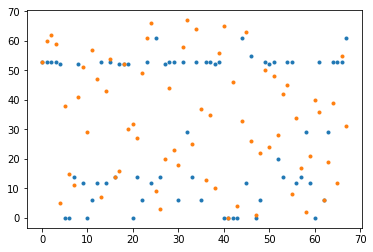

In [26]:
from sklearn import preprocessing

from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(y_train)
log_reg.fit(X_train, encoded)
y_pred=log_reg.predict(X_train)
y_pred_train = log_reg.predict(X_train)
plt.plot(y_pred_train, '.')
plt.plot(encoded, '.')
y_pred_train.shape, encoded.shape

In [27]:
encoded
accuracy_scores = cross_val_score(log_reg, X_train, encoded)

LR_coef = log_reg.coef_
indx_sort_raw = log_reg.coef_.argsort()
indx_sort = indx_sort_raw[:,:].flatten()
name_sort = list(X.iloc[:,indx_sort])
accuracy_scores.mean()

# top 5 feature print
indx_most = indx_sort_raw[:,:5].flatten()
name_most = list(X.iloc[:,indx_most])
print(name_most)
plt.bar(np.arange(33),log_reg.coef_[:,indx_sort].squeeze())
plt.xticks(np.arange(33),name_sort, rotation='vertical')
plt.show()

/Users/soyoung/anaconda2/envs/ipykernel_py3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [ ]:
# Clean data
def clean_data(pd) -> int:
    pass

In [ ]:
# Build recommandation system
def recommendation_sys(int) -> int:
    pass

In [ ]:
# Combine all function
def candy_recommendation(int) -> dict:
    candy_data = load_candy_data(fname)
    pass

In [ ]:
sns.pairplot(data[['sugarpercent', 'pricepercent', 'winpercent']]);